In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from skimpy import clean_columns
from wordcloud import WordCloud
from my_functions import *

In [4]:
# Display float with 2 decimal values
pd.options.display.float_format = '{:.2f}'.format

# Get & Inspect the data

In [5]:
raw = pd.read_csv("https://pythonandvba.com/youtube-data.csv")

In [7]:
# Sample the data
raw.sample(5)

Content                                        Video title  \
102  ldJR61FLhqw  How To Create A GUI Program In Python Using Tk...   
32   LzCfNanQ_9c  Create an advanced GUI app with PySimpleGUI (F...   
9    xE95tIzCuKM  Turn Your Excel Data Into An Interactive Dashb...   
86   EvvmOVyQaVY  Automate Tinder with EXCEL | Step-By-Step Tuto...   
24   ZI9T2O7XYxY  Solve Real-World Data Science Tasks in Python ...   

    Video publish time  Comments added  Average percentage viewed (%)  Likes  \
102          13-Sep-20               3                          31.51     46   
32           17-Jul-22              31                          12.62    424   
9            27-Mar-22              64                          18.92    896   
86           25-Sep-21               7                          17.39     45   
24           31-Jan-21              40                          14.59    414   

     Views  Impressions  Impressions click-through rate (%)  
102   1994        37525                                3.43  
32   12537       164553                                4.69  
9    24612       541894                                2.23  
86    1343        26336                                2.67  
24   12911       133624                                5.22

In [10]:
# Get an overview of the data
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             107 non-null    object 
 1   Video title                         107 non-null    object 
 2   Video publish time                  102 non-null    object 
 3   Comments added                      107 non-null    int64  
 4   Average percentage viewed (%)       107 non-null    float64
 5   Likes                               107 non-null    int64  
 6   Views                               107 non-null    int64  
 7   Impressions                         107 non-null    int64  
 8   Impressions click-through rate (%)  106 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ KB


In [13]:
# Check missing values
missing_values_table(raw)

Dein Datensatz hat 9 columns.
Es gibt 2 Spalten mit missing values.


Missing Values  % of Total Values
Video publish time                               5               4.70
Impressions click-through rate (%)               1               0.90

In [14]:
# Display rows with missing values
raw[raw.isnull().any(axis="columns")]

Content                                        Video title  \
94   8E4se9Ah5o8                            MyToolBelt Installation   
96   V3Csrk--laM                            Create Invoice Filepath   
100  RnTqlKzQhRY                          PySimpleGUI Retrieve Data   
105  l4Dd1xLfNVY                                     xlwings - demo   
106  pqIjey6Cbhw  How to resolve "pytube.exceptions.RegexMatchEr...   

    Video publish time  Comments added  Average percentage viewed (%)  Likes  \
94                 NaN               5                          72.18     22   
96                 NaN               5                          70.11      1   
100                NaN               4                          85.97      6   
105                NaN               0                         102.23      0   
106                NaN               0                          44.91      0   

     Views  Impressions  Impressions click-through rate (%)  
94    1309           13                                0.00  
96      16            5                                0.00  
100    182           78                                2.56  
105      3            0                                 NaN  
106     13            3                                0.00

In [15]:
# Generate descriptive statistics
raw.describe().T

count      mean        std   min      25%  \
Comments added                     107.00     37.24      89.53  0.00     8.50   
Average percentage viewed (%)      107.00     33.75      16.57 12.62    23.55   
Likes                              107.00    417.86    1081.01  0.00    92.50   
Views                              107.00  17792.68   50709.27  3.00  2582.00   
Impressions                        107.00 249785.20 1133091.96  0.00 43961.00   
Impressions click-through rate (%) 106.00      4.46       2.06  0.00     3.06   

                                        50%       75%         max  
Comments added                        21.00     33.50      885.00  
Average percentage viewed (%)         28.91     38.79      102.23  
Likes                                203.00    352.50    10175.00  
Views                               6382.00  12968.50   442044.00  
Impressions                        79838.00 132846.50 11550064.00  
Impressions click-through rate (%)     4.17      5.73       10.86

In [16]:
# Inspect highest average percentage viewed
raw.nlargest(5, columns=["Average percentage viewed (%)"])

Content                                        Video title  \
105  l4Dd1xLfNVY                                     xlwings - demo   
100  RnTqlKzQhRY                          PySimpleGUI Retrieve Data   
89   HYl-gftg9Rw  How To Save Cookies & Login Data In Selenium V...   
75   0_HlInz6HuM  How To Remove ‚ÄúMade with Streamlit‚Äù, Hamburger...   
99   JaPj_gOTg6M  Pull Stock Data & Export It To Excel Using Pyt...   

    Video publish time  Comments added  Average percentage viewed (%)  Likes  \
105                NaN               0                         102.23      0   
100                NaN               4                          85.97      6   
89           21-Sep-21               6                          81.96     46   
75           22-Jul-21              10                          78.33    115   
99            6-Mar-21               4                          73.26     89   

     Views  Impressions  Impressions click-through rate (%)  
105      3            0                                 NaN  
100    182           78                                2.56  
89    2436          325                                3.38  
75    3708        31197                                3.57  
99    1961        37686                                2.76

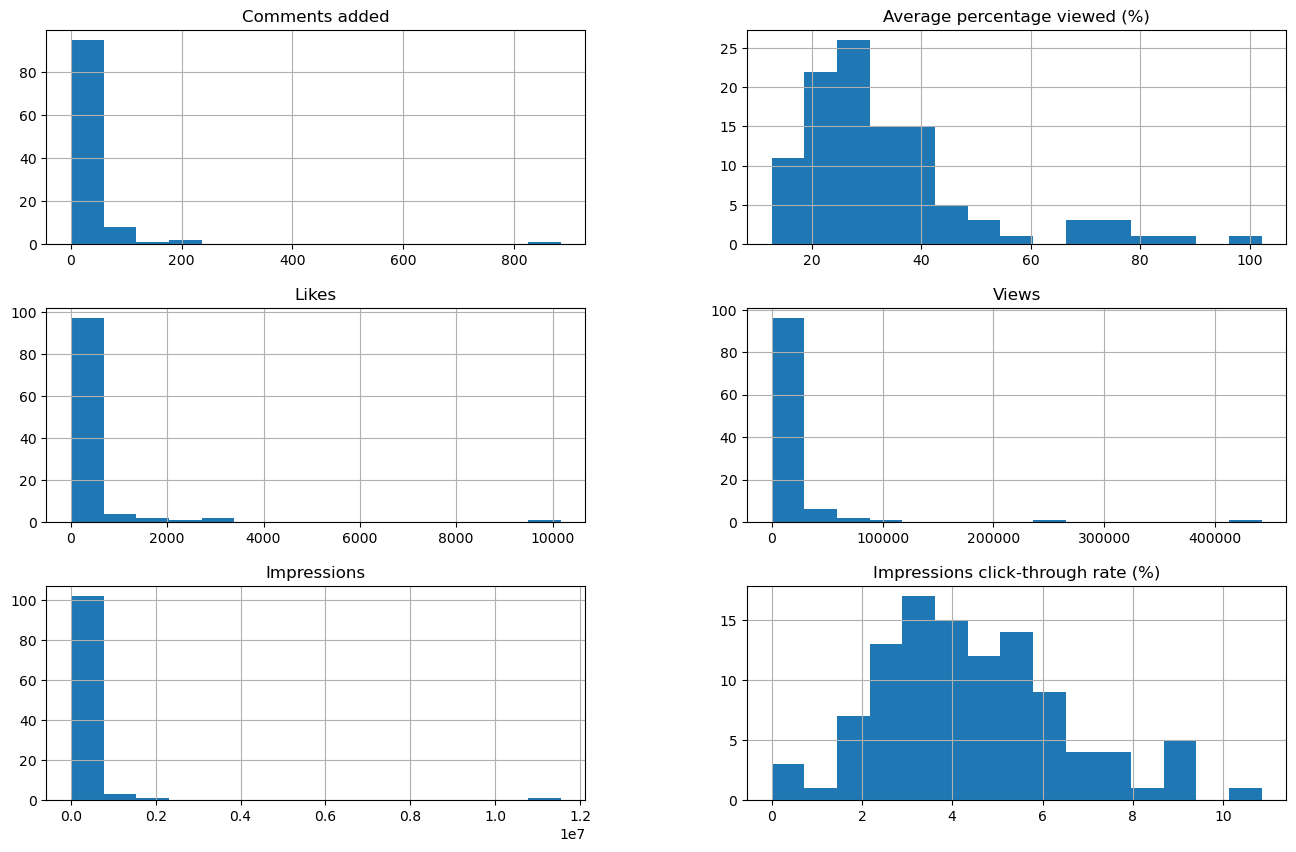

In [17]:
# Most features (columns) are showing a difference between mean <> median
# This indicates that the data is skewed
hist = raw.hist(bins=15, figsize=(16,10))

C:\Users\jan.lade\AppData\Local\Temp\ipykernel_3640\3249054074.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(raw.corr(), cmap="BuPu", annot=True, fmt=".3f")


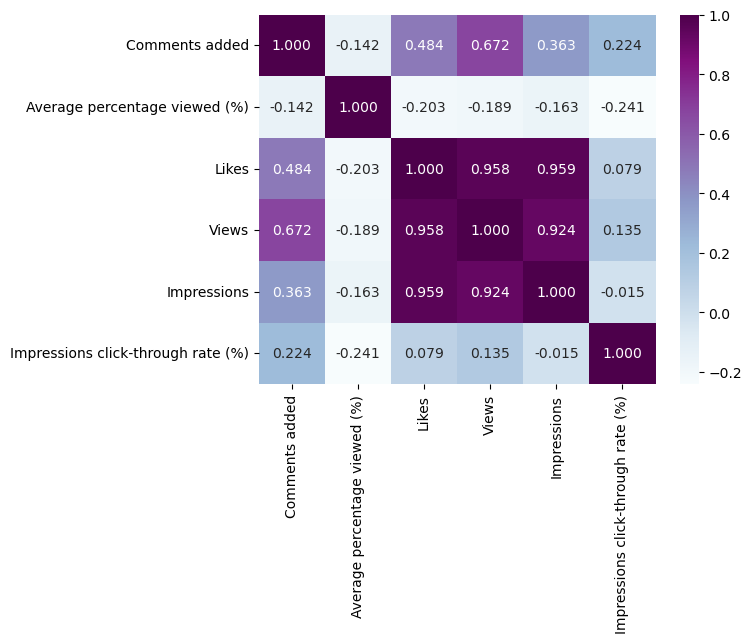

In [19]:
# Plot heatmap
heatmap = sns.heatmap(raw.corr(), cmap="BuPu", annot=True, fmt=".3f")


In [23]:
# Check correlation of the features (columns)
(raw
 .corr()
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

C:\Users\jan.lade\AppData\Local\Temp\ipykernel_3640\331218267.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  .corr()


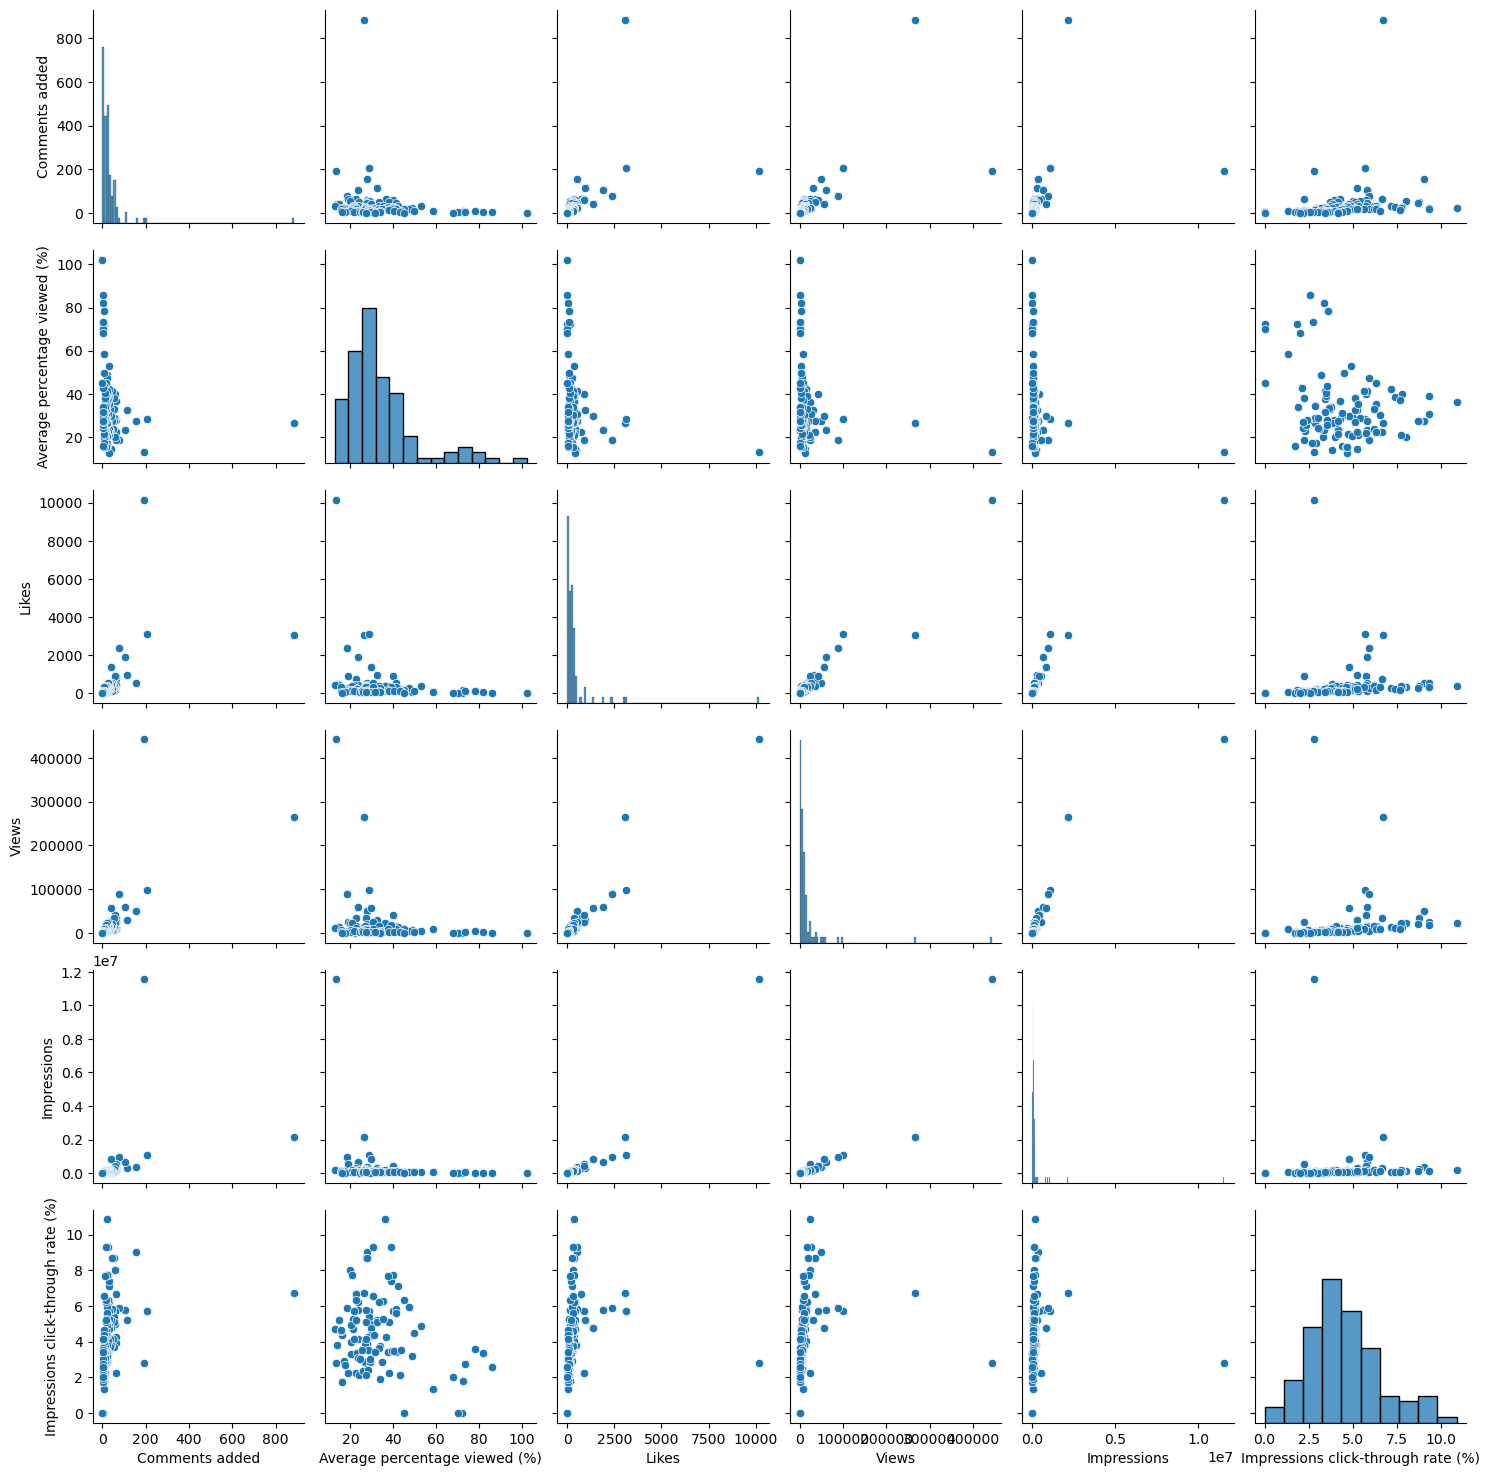

In [24]:
# Plot pairwise relationships
sns.pairplot(raw)

In [25]:
# Show outliers
raw["Views"].nlargest(8)

2     442044
0     265002
1      99259
6      88223
5      59870
23     56273
3      50270
11     42471
Name: Views, dtype: int64

In [26]:
# Set upper limit for outliers
q_hi = raw["Views"].quantile(0.99)
q_hi

255057.41999999963

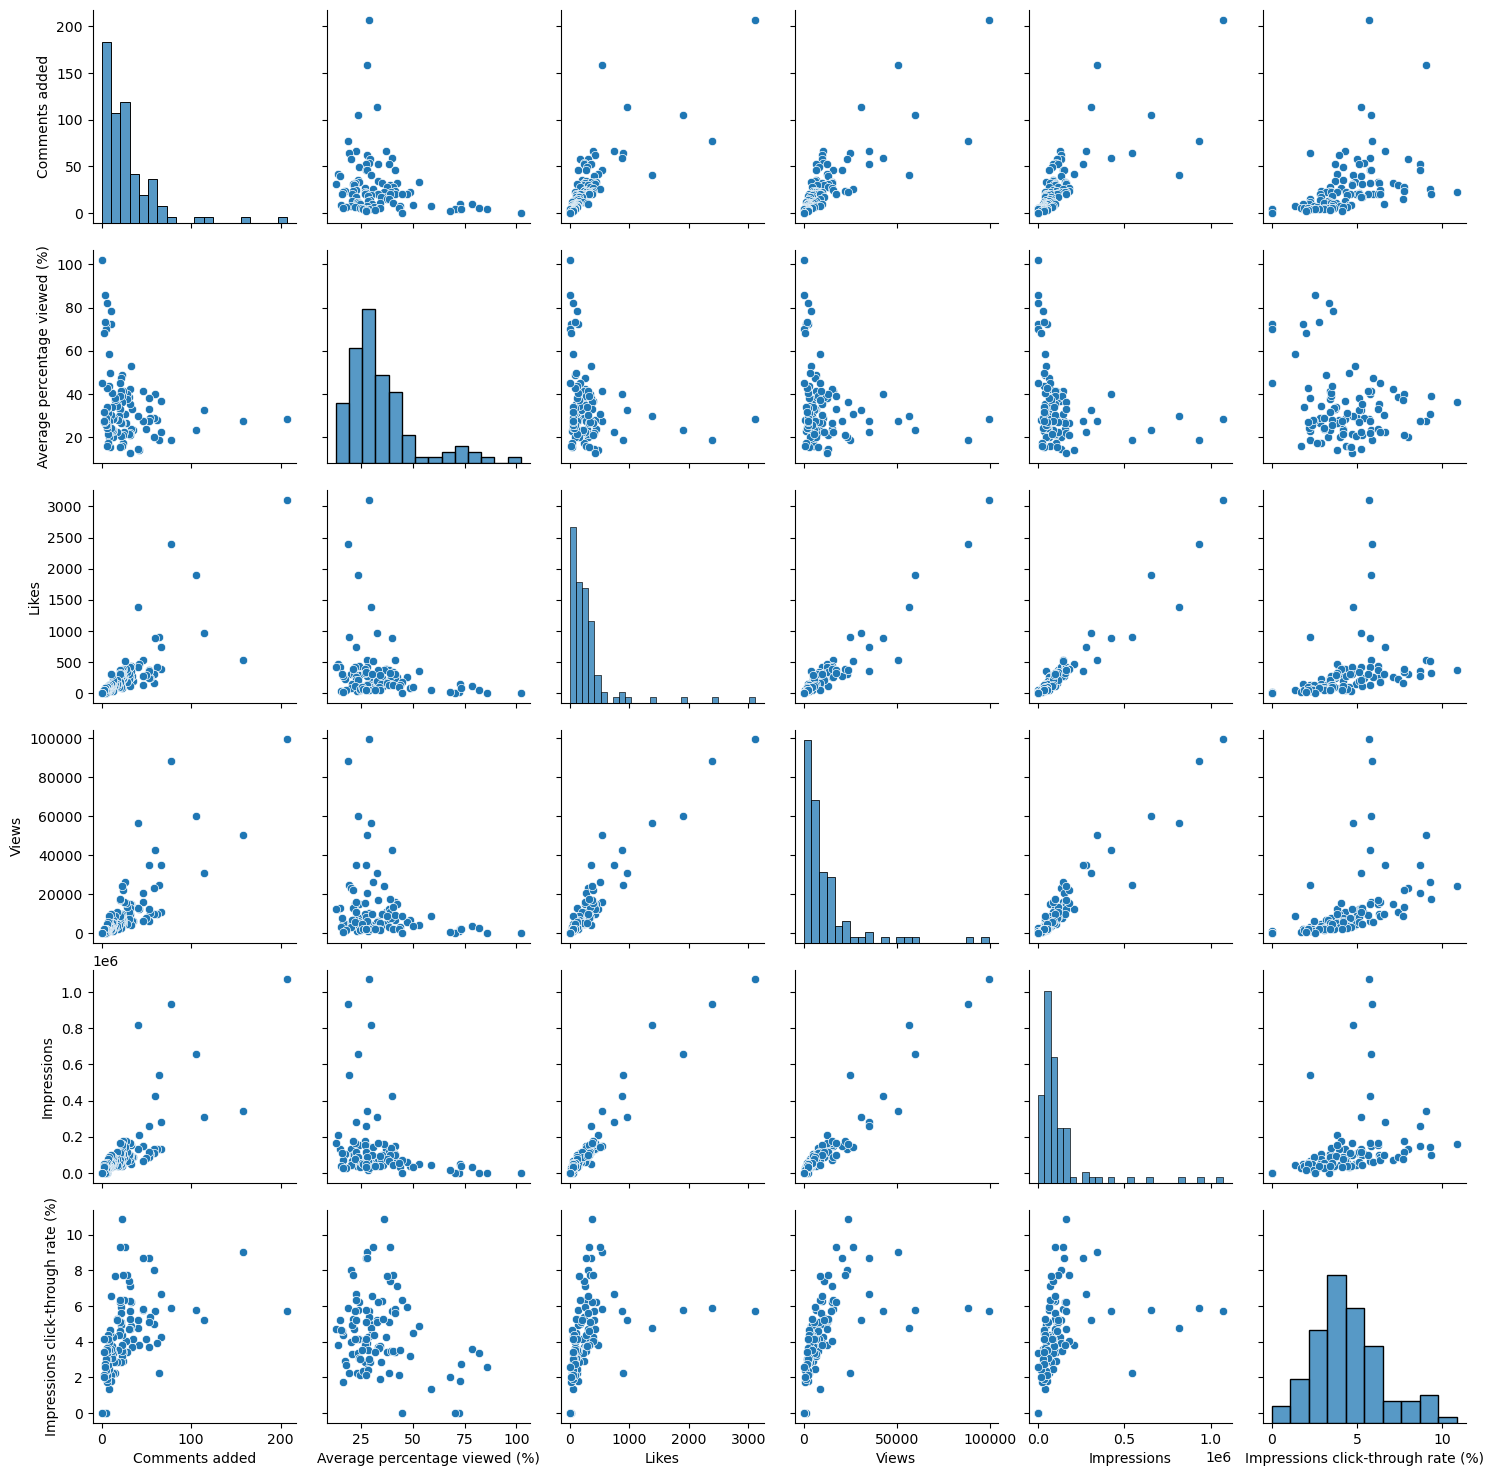

In [27]:
# Plot pairwise relationships w/o outliers
sns.pairplot(raw.query("Views < @q_hi"))

#  Clean up the DataFrame
## Simple Example of Pandas method chaining

In [28]:
# You can chain pandas method like so:
raw.query("Views > 1000").filter(regex="^V", axis="columns").rename(columns={"Video title": "Video_title"})

Video_title Video publish time  \
0    How To Send WhatsApp Messages From Excel Using...          19-Dec-20   
1    How to Create an Excel Data Entry Form in 10 M...          22-May-21   
2    Turn An Excel Sheet Into An Interactive Dashbo...          11-Sep-21   
3    Send BULK SMS From Your OWN Number Using EXCEL...          10-Jul-21   
4    Deploy Your Streamlit Web App on Heroku For Fr...          20-Mar-21   
..                                                 ...                ...   
98   How To Create An Interactive Population Pyrami...          24-Dec-20   
99   Pull Stock Data & Export It To Excel Using Pyt...           6-Mar-21   
101  Add a snowflake animation to your streamlit we...          24-Dec-21   
102  How To Create A GUI Program In Python Using Tk...          13-Sep-20   
104  Create Gauge & Bullet Charts In 3 Seconds Usin...          26-Dec-20   

      Views  
0    265002  
1     99259  
2    442044  
3     50270  
4     30941  
..      ...  
98     2121  
99     1961  
101    2087  
102    1994  
104    2159  

[100 rows x 3 columns]

In [29]:
# You can also break it down into multiple lines
# By doing so, it makes it easier to debug, as you can comment out line by line
(raw
 .query("Views > 1000")
 .filter(regex="^V", axis="columns")
 .rename(columns={"Video title": "Video_title"})
)

Video_title Video publish time  \
0    How To Send WhatsApp Messages From Excel Using...          19-Dec-20   
1    How to Create an Excel Data Entry Form in 10 M...          22-May-21   
2    Turn An Excel Sheet Into An Interactive Dashbo...          11-Sep-21   
3    Send BULK SMS From Your OWN Number Using EXCEL...          10-Jul-21   
4    Deploy Your Streamlit Web App on Heroku For Fr...          20-Mar-21   
..                                                 ...                ...   
98   How To Create An Interactive Population Pyrami...          24-Dec-20   
99   Pull Stock Data & Export It To Excel Using Pyt...           6-Mar-21   
101  Add a snowflake animation to your streamlit we...          24-Dec-21   
102  How To Create A GUI Program In Python Using Tk...          13-Sep-20   
104  Create Gauge & Bullet Charts In 3 Seconds Usin...          26-Dec-20   

      Views  
0    265002  
1     99259  
2    442044  
3     50270  
4     30941  
..      ...  
98     2121  
99     1961  
101    2087  
102    1994  
104    2159  

[100 rows x 3 columns]

## Using Pandas method chaining to clean the DataFrame

In [31]:
# For reference the initial dataframe
raw.head(3)

Content                                        Video title  \
0  Wn9L1MD_y0Y  How To Send WhatsApp Messages From Excel Using...   
1  svcv8uub0D0  How to Create an Excel Data Entry Form in 10 M...   
2  Sb0A9i6d320  Turn An Excel Sheet Into An Interactive Dashbo...   

  Video publish time  Comments added  Average percentage viewed (%)  Likes  \
0          19-Dec-20             885                          26.36   3057   
1          22-May-21             207                          28.48   3112   
2          11-Sep-21             192                          13.14  10175   

    Views  Impressions  Impressions click-through rate (%)  
0  265002      2152704                                6.71  
1   99259      1069755                                5.70  
2  442044     11550064                                2.79

In [32]:
def clean_df(df, views_threshold=500):
    remove_cols = ["Impressions", "Content"]
    remove_nan_values = ["Video publish time", "Impressions click-through rate (%)"]
    return (df
        .drop(labels=remove_cols, axis="columns")
        .dropna(subset=remove_nan_values)
        .pipe(clean_columns)
        .rename(
            columns={
                "impressions_click_through_rate_%": "impressions_ctr_pct",
                "average_percentage_viewed_%": "average_viewed_pct"
            }
        )
        .query("views > @views_threshold")
        .assign(video_publish_time=lambda df_: pd.to_datetime(df_.video_publish_time),
                days_since_published=lambda df_: (pd.to_datetime("today") - df_.video_publish_time).dt.days.astype(int),
                likes_per_day=lambda df_: (df_.likes / df_.days_since_published).round(2),
                likes_to_view_ratio_pct=lambda df_: ((df_.likes / df_.views) * 100).round(2),
                comments_to_view_ratio_pct=lambda df_: ((df_.comments_added / df_.views) * 100).round(2),
               )
    )
df = clean_df(raw)
df.head(3)

7 column names have been cleaned

video_title video_publish_time  \
0  How To Send WhatsApp Messages From Excel Using...         2020-12-19   
1  How to Create an Excel Data Entry Form in 10 M...         2021-05-22   
2  Turn An Excel Sheet Into An Interactive Dashbo...         2021-09-11   

   comments_added  average_viewed_pct  likes   views  impressions_ctr_pct  \
0             885               26.36   3057  265002                 6.71   
1             207               28.48   3112   99259                 5.70   
2             192               13.14  10175  442044                 2.79   

   days_since_published  likes_per_day  likes_to_view_ratio_pct  \
0                   709           4.31                     1.15   
1                   555           5.61                     3.14   
2                   443          22.97                     2.30   

   comments_to_view_ratio_pct  
0                        0.33  
1                        0.21  
2                        0.04

# Plot the data

<AxesSubplot:xlabel='video_publish_time'>

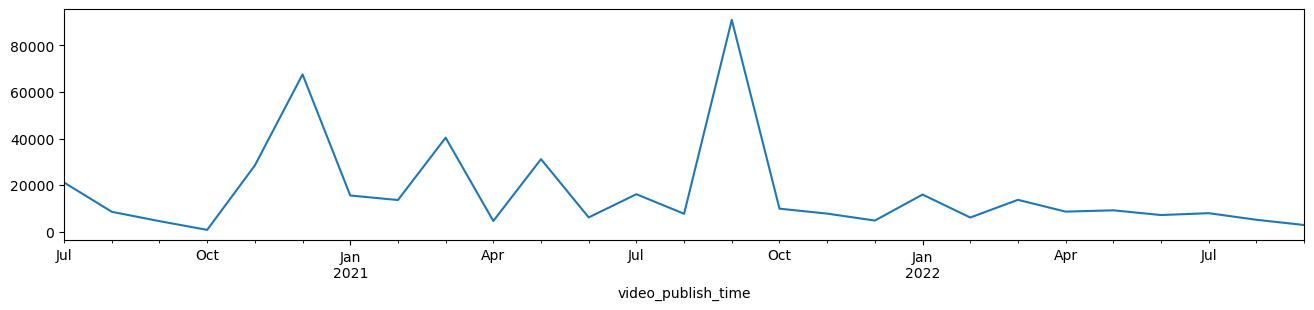

In [34]:
# A simple plot
(df
 .set_index("video_publish_time")
 .sort_index()
 .views
 .resample("m")
 .mean()
 .fillna(0)
 .plot(figsize=(16,3))
)

In [35]:
def plot_timeseries(df, columns):
    df = df.set_index("video_publish_time").sort_index()
    fig = px.line(
        df,
        x=df.index,
        y=columns,
        template="simple_white",
        hover_name="video_title",
        title=f"Development: {', '.join(columns).title()}",
    )
    fig.update_layout(hovermode="x unified", margin=dict(l=0, r=0, t=50, b=5))
    return fig

fig = plot_timeseries(df=df, columns=["views", "likes", "comments_added"])
fig.show()

## Barchart: Top X Videos

In [42]:
def plot_column(df, column, top_values=10, color="#d33682"):
    df = df.nlargest(top_values, columns=column).sort_values(by=column)
    title = f"{column.replace('_',' ').replace('pct','%').title()} - Top {top_values} videos"
    mean = df[column].mean()
    median = df[column].median()

    fig = px.bar(
        df,
        x=column,
        y="video_title",
        orientation="h",
        title=title,
        color_discrete_sequence=[color] * top_values,
        template="plotly_white",
        text=column,
    )
    # add a vertical "mean" line
    fig.add_vline(
        x=mean,
        line_color="gray",
        line_width=3,
        opacity=1,
        line_dash="dot",
        annotation_position="top",
        annotation=dict(text="mean", font_size=12, font_color="gray"),
    )
    # add a vertical "mediam" line
    fig.add_vline(
        x=median,
        line_color="salmon",
        line_width=3,
        opacity=1,
        line_dash="dot",
        annotation_position="bottom",
        annotation=dict(text="median", font_size=12, font_color="salmon"),
    )
    fig.update_layout(
        plot_bgcolor="rgba(0,0,0,0)",
        yaxis=(dict(showgrid=False, title=None)),
        xaxis=(dict(showgrid=False, title=None, showticklabels=False)),
        margin=dict(l=0, r=0, t=50, b=5),
    )
    return fig

In [43]:
# print all numeric columns
df.select_dtypes('number').columns.to_list()

['comments_added',
 'average_viewed_pct',
 'likes',
 'views',
 'impressions_ctr_pct',
 'days_since_published',
 'likes_per_day',
 'likes_to_view_ratio_pct',
 'comments_to_view_ratio_pct']

In [44]:
fig = plot_column(df=df, column="likes_to_view_ratio_pct", top_values=8)
fig.show()
# Optional: Export the chart to a standalone HTML file
fig.write_html("chart.html")

# Wordcloud: Video Titles

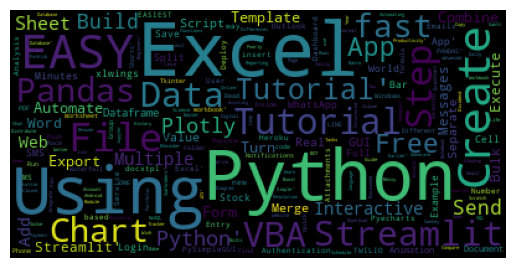

In [45]:
def generate_wordcloud(df, column, max_font_size=60, collocations=False):
    text = df[column].values
    return WordCloud(max_font_size=max_font_size, collocations=collocations).generate(str(text))   

wordcloud = generate_wordcloud(df, "video_title")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()